In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
orvile_inme_veri_seti_stroke_dataset_path = kagglehub.dataset_download('orvile/inme-veri-seti-stroke-dataset')

print('Data source import complete.')


100%|██████████| 991M/991M [00:09<00:00, 113MB/s]

Extracting files...


Data source import complete.


In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("orvile/inme-veri-seti-stroke-dataset")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/orvile/inme-veri-seti-stroke-dataset/versions/1


In [3]:
import os
data_dir_0 = '/root/.cache/kagglehub/datasets/orvile/inme-veri-seti-stroke-dataset/versions/1'
for root, dirs, files in os.walk(data_dir_0):
    print(root, len(files), 'files')

/root/.cache/kagglehub/datasets/orvile/inme-veri-seti-stroke-dataset/versions/1 0 files
/root/.cache/kagglehub/datasets/orvile/inme-veri-seti-stroke-dataset/versions/1/İNME VERİ SETİ 2 files
/root/.cache/kagglehub/datasets/orvile/inme-veri-seti-stroke-dataset/versions/1/İNME VERİ SETİ/Kanama 0 files
/root/.cache/kagglehub/datasets/orvile/inme-veri-seti-stroke-dataset/versions/1/İNME VERİ SETİ/Kanama/PNG 1093 files
/root/.cache/kagglehub/datasets/orvile/inme-veri-seti-stroke-dataset/versions/1/İNME VERİ SETİ/Kanama/OVERLAY 1093 files
/root/.cache/kagglehub/datasets/orvile/inme-veri-seti-stroke-dataset/versions/1/İNME VERİ SETİ/Kanama/DICOM 1093 files
/root/.cache/kagglehub/datasets/orvile/inme-veri-seti-stroke-dataset/versions/1/İNME VERİ SETİ/YarısmaVeriSeti_2_Oturum 0 files
/root/.cache/kagglehub/datasets/orvile/inme-veri-seti-stroke-dataset/versions/1/İNME VERİ SETİ/YarısmaVeriSeti_2_Oturum/MASKS 100 files
/root/.cache/kagglehub/datasets/orvile/inme-veri-seti-stroke-dataset/versions/

In [4]:
import os

old_path = "/root/.cache/kagglehub/datasets/orvile/inme-veri-seti-stroke-dataset/versions/1/İNME VERİ SETİ"
new_path = "/root/.cache/kagglehub/datasets/orvile/inme-veri-seti-stroke-dataset/versions/1/INME_VERI_SETI"

os.rename(old_path, new_path)


In [5]:
import os
data_dir_0 = '/root/.cache/kagglehub/datasets/orvile/inme-veri-seti-stroke-dataset/versions/1'
for root, dirs, files in os.walk(data_dir_0):
    print(root, len(files), 'files')

/root/.cache/kagglehub/datasets/orvile/inme-veri-seti-stroke-dataset/versions/1 0 files
/root/.cache/kagglehub/datasets/orvile/inme-veri-seti-stroke-dataset/versions/1/INME_VERI_SETI 2 files
/root/.cache/kagglehub/datasets/orvile/inme-veri-seti-stroke-dataset/versions/1/INME_VERI_SETI/Kanama 0 files
/root/.cache/kagglehub/datasets/orvile/inme-veri-seti-stroke-dataset/versions/1/INME_VERI_SETI/Kanama/PNG 1093 files
/root/.cache/kagglehub/datasets/orvile/inme-veri-seti-stroke-dataset/versions/1/INME_VERI_SETI/Kanama/OVERLAY 1093 files
/root/.cache/kagglehub/datasets/orvile/inme-veri-seti-stroke-dataset/versions/1/INME_VERI_SETI/Kanama/DICOM 1093 files
/root/.cache/kagglehub/datasets/orvile/inme-veri-seti-stroke-dataset/versions/1/INME_VERI_SETI/YarısmaVeriSeti_2_Oturum 0 files
/root/.cache/kagglehub/datasets/orvile/inme-veri-seti-stroke-dataset/versions/1/INME_VERI_SETI/YarısmaVeriSeti_2_Oturum/MASKS 100 files
/root/.cache/kagglehub/datasets/orvile/inme-veri-seti-stroke-dataset/versions/

In [6]:
!pip install segmentation-models


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 4.7 MB/s eta 0:00:00


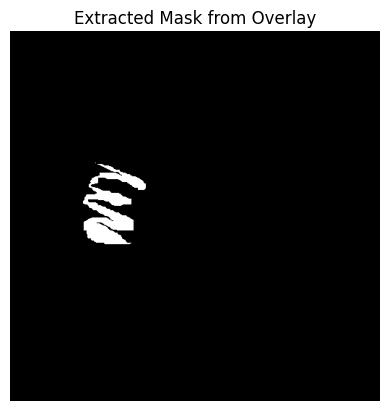

In [8]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def extract_red_mask(overlay_img_path):
    # Load image using PIL and convert to RGB
    img = Image.open(overlay_img_path).convert('RGB')
    img_np = np.array(img)

    # Convert RGB to HSV
    img_hsv = np.array(img.convert('HSV'))

    # Split HSV channels
    h, s, v = img_hsv[:, :, 0], img_hsv[:, :, 1], img_hsv[:, :, 2]

    # Define red mask in HSV (hue values in PIL range from 0 to 255)
    # Scale hue range: OpenCV [0-180] => PIL [0-255]
    lower_red1 = ((h >= 0) & (h <= 10 * 255 // 180)) & (s >= 100) & (v >= 100)
    upper_red2 = ((h >= 160 * 255 // 180) & (h <= 255)) & (s >= 100) & (v >= 100)

    red_mask = lower_red1 | upper_red2

    # Convert boolean mask to uint8 binary mask
    binary_mask = red_mask.astype(np.uint8)

    return binary_mask

# Example usage
mask = extract_red_mask("/root/.cache/kagglehub/datasets/orvile/inme-veri-seti-stroke-dataset/versions/1/INME_VERI_SETI/İskemi/OVERLAY/10003.png")
plt.imshow(mask, cmap='gray')
plt.title("Extracted Mask from Overlay")
plt.axis('off')
plt.show()


In [10]:
import os
from tqdm import tqdm
import cv2
def batch_convert_overlays_to_masks(overlay_dir, output_dir):
    os.makedirs(output_dir, exist_ok=True)
    overlay_files = [f for f in os.listdir(overlay_dir) if f.endswith('.png')]

    for fname in tqdm(overlay_files, desc="Converting overlays"):
        in_path = os.path.join(overlay_dir, fname)
        out_path = os.path.join(output_dir, fname)

        mask = extract_red_mask(in_path) * 255  # Convert 0/1 to 0/255
        cv2.imwrite(out_path, mask)

# Example
kanama_overlay_dir = "/root/.cache/kagglehub/datasets/orvile/inme-veri-seti-stroke-dataset/versions/1/INME_VERI_SETI/Kanama/OVERLAY"
iskemi_overlay_dir = "/root/.cache/kagglehub/datasets/orvile/inme-veri-seti-stroke-dataset/versions/1/INME_VERI_SETI/İskemi/OVERLAY"

kanama_mask_output = "/content/converted_masks/kanama"
iskemi_mask_output = "/content/converted_masks/iskemi"

batch_convert_overlays_to_masks(kanama_overlay_dir, kanama_mask_output)
batch_convert_overlays_to_masks(iskemi_overlay_dir, iskemi_mask_output)


Converting overlays: 100%|██████████| 1130/1130 [00:09<00:00, 123.17it/s]


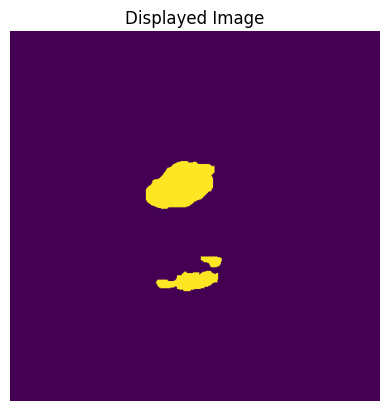

In [11]:
from PIL import Image
import matplotlib.pyplot as plt

def show_image(image_path):
    # Open the image using PIL
    image = Image.open(image_path)

    # Display the image using matplotlib
    plt.imshow(image)
    plt.axis('off')  # Hide axis ticks
    plt.title("Displayed Image")
    plt.show()

show_image("/content/converted_masks/kanama/10033.png")


In [12]:
import os
import tensorflow as tf

def write_image_batches_to_tfr(
    img_filenames,
    label_filenames,
    filename: str = "batch",
    max_files: int = 100,
    out_dir: str = "/data/tfrecord/",
    augmentation=None,
    preprocessing=None
):
    os.makedirs(os.path.join(out_dir, filename), exist_ok=True)

    num_examples = len(img_filenames)
    num_shards = (num_examples + max_files - 1) // max_files

    print(f"Writing {num_examples} examples to {num_shards} TFRecord shards...")

    def create_example(image_path, label_path):
        image_data = tf.io.read_file(image_path)
        label_data = tf.io.read_file(label_path)

        image = tf.io.decode_png(image_data, channels=3)
        label = tf.io.decode_png(label_data, channels=3)

        # Resize to 512x512 and cast to float32
        image = tf.image.resize(image, [512, 512])
        label = tf.image.resize(label, [512, 512], method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)

        image = tf.cast(image, tf.float32)
        label = tf.cast(label, tf.float32)

        # Apply preprocessing or augmentation if any
        if preprocessing:
            image, label = preprocessing(image, label)
        if augmentation:
            image, label = augmentation(image, label)

        image_tensor = tf.io.serialize_tensor(image)
        label_tensor = tf.io.serialize_tensor(label)

        feature = {
            'image/raw_image': tf.train.Feature(bytes_list=tf.train.BytesList(value=[image_tensor.numpy()])),
            'label/raw': tf.train.Feature(bytes_list=tf.train.BytesList(value=[label_tensor.numpy()])),
            'image/height': tf.train.Feature(int64_list=tf.train.Int64List(value=[512])),
            'image/width': tf.train.Feature(int64_list=tf.train.Int64List(value=[512])),
            'image/channels': tf.train.Feature(int64_list=tf.train.Int64List(value=[3])),
            'image/filename': tf.train.Feature(bytes_list=tf.train.BytesList(value=[os.path.basename(image_path).encode()])),
        }

        return tf.train.Example(features=tf.train.Features(feature=feature))

    for shard_id in range(num_shards):
        start_idx = shard_id * max_files
        end_idx = min((shard_id + 1) * max_files, num_examples)

        output_filename = os.path.join(out_dir, filename, f"{filename}_{shard_id:05d}.tfrecords")
        with tf.io.TFRecordWriter(output_filename, options="ZLIB") as writer:
            for i in range(start_idx, end_idx):
                example = create_example(img_filenames[i], label_filenames[i])
                writer.write(example.SerializeToString())

        print(f"✅ Wrote shard {shard_id+1}/{num_shards} with {end_idx - start_idx} examples")

    print("🎉 All TFRecords written!")


In [13]:
import os
import random
import tensorflow as tf

# Constants
BASE_PATH = new_path
KANAMA_IMG = os.path.join(BASE_PATH, "Kanama/PNG")
KANAMA_MASK = "/content/converted_masks/kanama"
ISKEMI_IMG = os.path.join(BASE_PATH, "İskemi/PNG")
ISKEMI_MASK = "/content/converted_masks/iskemi"
OUT_PATH = "/content/tfrecord_out/"
IMG_EXT = "png"
MAX_FILES = 600  # Per TFRecord shard
CLASS_VALUES = [1, 2]
CLASS_NAMES = ["Iskemik", "Hemorajik", "Unlabelled"]
ENCODING_TYPE = "ZLIB"


# Get image-label pairs
def get_image_label_pairs(image_dir, label_dir):
    images = tf.io.gfile.glob(f"{image_dir}/*.{IMG_EXT}")
    images.sort()
    labels = [img.replace(image_dir, label_dir) for img in images]
    return images, labels

# Combine ischemic and hemorrhagic sets
kanama_imgs, kanama_labels = get_image_label_pairs(KANAMA_IMG, KANAMA_MASK)
iskemi_imgs, iskemi_labels = get_image_label_pairs(ISKEMI_IMG, ISKEMI_MASK)
print(f"Found {len(kanama_imgs)} hemorrhagic images")
print(f"Found {len(iskemi_imgs)} ischemic images")


all_imgs = kanama_imgs + iskemi_imgs
all_labels = kanama_labels + iskemi_labels

# Shuffle and split
combined = list(zip(all_imgs, all_labels))
random.shuffle(combined)

train_ratio = 0.9
split_idx = int(len(combined) * train_ratio)
train_set = combined[:split_idx]
val_set = combined[split_idx:]

train_imgs, train_labels = zip(*train_set)
val_imgs, val_labels = zip(*val_set)

print(f"Train: {len(train_imgs)} | Val: {len(val_imgs)}")

# Write TFRecords
write_image_batches_to_tfr(
    train_imgs, train_labels, filename="train",
    max_files=MAX_FILES, out_dir=OUT_PATH,
    augmentation=None, preprocessing=None
)

write_image_batches_to_tfr(
    val_imgs, val_labels, filename="val",
    max_files=MAX_FILES, out_dir=OUT_PATH,
    augmentation=None, preprocessing=None
)


Found 1093 hemorrhagic images
Found 1130 ischemic images
Train: 2000 | Val: 223
Writing 2000 examples to 4 TFRecord shards...
✅ Wrote shard 1/4 with 600 examples
✅ Wrote shard 2/4 with 600 examples
✅ Wrote shard 3/4 with 600 examples
✅ Wrote shard 4/4 with 200 examples
🎉 All TFRecords written!
Writing 223 examples to 1 TFRecord shards...
✅ Wrote shard 1/1 with 223 examples
🎉 All TFRecords written!


In [14]:
train_tfrecords = tf.io.gfile.glob("/content/tfrecord_out/train/*.tfrecords")
val_tfrecords = tf.io.gfile.glob("/content/tfrecord_out/val/*.tfrecords")

In [15]:
print("Train:", len(train_tfrecords))
print("Val:", len(val_tfrecords))

Train: 4
Val: 1


In [16]:
def parse_example(example_proto):
    feature_description = {
        'image/raw_image': tf.io.FixedLenFeature([], tf.string),
        'label/raw': tf.io.FixedLenFeature([], tf.string),
    }

    parsed = tf.io.parse_single_example(example_proto, feature_description)

    # These were saved as float32 tensors in TFRecords
    image = tf.io.parse_tensor(parsed['image/raw_image'], out_type=tf.float32)
    label = tf.io.parse_tensor(parsed['label/raw'], out_type=tf.float32)

    # Reshape back to expected dimensions
    image = tf.reshape(image, [512, 512, 3])
    label = tf.reshape(label, [512, 512, 3])

    return image, label


In [17]:
def load_tfrecord_dataset(tfrecord_paths, batch_size=8, shuffle=True):
    dataset = tf.data.TFRecordDataset(tfrecord_paths, compression_type="ZLIB")

    # Use parse_example on each record
    dataset = dataset.map(parse_example, num_parallel_calls=tf.data.AUTOTUNE)

    if shuffle:
        dataset = dataset.shuffle(buffer_size=1000)

    dataset = dataset.batch(batch_size)
    dataset = dataset.prefetch(tf.data.AUTOTUNE)

    return dataset


In [4]:
import os
import tensorflow as tf
os.environ["SM_FRAMEWORK"] = "tf.keras"
from tensorflow import keras
import segmentation_models as sm
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, CSVLogger

# CONFIG
BACKBONE = 'efficientnetb3'
sm.set_framework('tf.keras')
sm.framework()
LR = 1e-4
EPOCHS = 50
BATCH_SIZE = 2
STEPS_PER_EPOCH = 1000 // BATCH_SIZE
VAL_STEPS_PER_EPOCH = 223 // BATCH_SIZE
MODEL_SAVE_PATH = "/content/models"
DATE_NAME = "combined_lovasz_focal"
N_CLASSES = 3  # 0 = background, 1 = ischemic, 2 = hemorrhagic
ACTIVATION = 'softmax'

# # ✅ LOSS FUNCTIONS
# from segmentation_models.losses import CategoricalFocalLoss
# focal_loss = CategoricalFocalLoss()

# def lovasz_grad(gt_sorted):
#     gts = tf.reduce_sum(gt_sorted)
#     intersection = gts - tf.cumsum(gt_sorted)
#     union = gts + tf.cumsum(1. - gt_sorted)
#     jaccard = 1. - intersection / union
#     jaccard = tf.concat([[jaccard[0]], jaccard[1:] - jaccard[:-1]], axis=0)
#     return jaccard

# def flatten_probas(probas, labels, ignore=None):
#     probas = tf.reshape(probas, [-1, tf.shape(probas)[-1]])
#     labels = tf.reshape(labels, [-1])
#     if ignore is not None:
#         valid = tf.not_equal(labels, ignore)
#         probas = tf.boolean_mask(probas, valid)
#         labels = tf.boolean_mask(labels, valid)
#     return probas, labels

# @tf.function
# def lovasz_softmax_flat(probas, labels, classes='present'):
#     C = probas.shape[-1] or tf.shape(probas)[-1]  # use static if available, dynamic fallback
#     labels = tf.cast(labels, tf.int32)  # 🔧 fix mismatch
#     losses = tf.TensorArray(dtype=tf.float32, size=C)

#     def body(c, losses):
#         fg = tf.cast(tf.equal(labels, c), probas.dtype)
#         class_pred = probas[:, c]
#         errors = tf.abs(fg - class_pred)
#         errors_sorted, perm = tf.nn.top_k(errors, k=tf.shape(errors)[0])
#         fg_sorted = tf.gather(fg, perm)
#         grad = lovasz_grad(fg_sorted)
#         loss = tf.tensordot(errors_sorted, tf.stop_gradient(grad), axes=1)
#         losses = losses.write(c, loss)
#         return c + 1, losses

#     _, losses = tf.while_loop(
#     lambda c, *_: c < C,
#     body,
#     [0, losses],
#     maximum_iterations=C ) # ✅ this fixes the XLA error
#     return tf.reduce_mean(losses.stack())

# @tf.function
# def lovasz_softmax(labels, logits, classes='present', per_image=False, ignore=None):
#     probas = tf.nn.softmax(logits)
#     if per_image:
#         losses = tf.map_fn(
#             lambda x: lovasz_softmax_flat(*flatten_probas(x[0], x[1], ignore), classes=classes),
#             (probas, labels),
#             fn_output_signature=tf.float32
#         )
#         return tf.reduce_mean(losses)
#     else:
#         return lovasz_softmax_flat(*flatten_probas(probas, labels, ignore), classes=classes)

# def combined_loss(y_true, y_pred):
#     y_true_argmax = tf.argmax(y_true, axis=-1)
#     lovasz = lovasz_softmax(y_true_argmax, y_pred)
#     focal = focal_loss(y_true, y_pred)
#     return 0.9 * lovasz + 0.1 * focal



# ✅ Dataset loader
def parse_example(example_proto):
    features = {
        'image/raw_image': tf.io.FixedLenFeature([], tf.string),
        'label/raw': tf.io.FixedLenFeature([], tf.string),
    }
    parsed = tf.io.parse_single_example(example_proto, features)
    image = tf.io.parse_tensor(parsed['image/raw_image'], out_type=tf.float32)
    label = tf.io.parse_tensor(parsed['label/raw'], out_type=tf.float32)
    image = tf.reshape(image, [512, 512, 3])
    label = tf.reshape(label, [512, 512, 3])
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

def load_dataset(filenames, batch_size=2, shuffle=True):
    dataset = tf.data.TFRecordDataset(filenames, compression_type="ZLIB")
    dataset = dataset.map(parse_example, num_parallel_calls=tf.data.AUTOTUNE)
    if shuffle:
        dataset = dataset.shuffle(1024)
    dataset = dataset.batch(batch_size).prefetch(tf.data.AUTOTUNE)
    return dataset

# ✅ TFRecord Paths
train_filenames = tf.io.gfile.glob("/content/tfrecord_out/train/*.tfrecords")
val_filenames = tf.io.gfile.glob("/content/tfrecord_out/val/*.tfrecords")
print("Train TFRecords:", len(train_filenames), "| Val TFRecords:", len(val_filenames))
# metrics
metrics = [sm.metrics.IOUScore(threshold=0.5), sm.metrics.FScore(threshold=0.5)]

# ✅ Datasets
train_dataset = load_dataset(train_filenames, BATCH_SIZE)
val_dataset = load_dataset(val_filenames, BATCH_SIZE, shuffle=False)
print(train_dataset.element_spec)
print(val_dataset.element_spec)

# ✅ Model
model = sm.Unet(BACKBONE, classes=N_CLASSES, activation=ACTIVATION)
model.compile(optimizer=tf.keras.optimizers.Adam(LR),
              loss=combined_loss,
              metrics=[sm.metrics.IOUScore(threshold=0.5), sm.metrics.FScore(threshold=0.5)])

# ✅ Callbacks
os.makedirs(f"{MODEL_SAVE_PATH}/{DATE_NAME}", exist_ok=True)
callbacks = [
    ModelCheckpoint(f"{MODEL_SAVE_PATH}/{DATE_NAME}/best.keras", save_best_only=True, monitor='val_loss', mode='min'),
    ReduceLROnPlateau(patience=3, factor=0.5),
    CSVLogger(f"/content/{DATE_NAME}_training.csv")
]





Train TFRecords: 4 | Val TFRecords: 1
(TensorSpec(shape=(None, 512, 512, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 512, 512, 3), dtype=tf.float32, name=None))
(TensorSpec(shape=(None, 512, 512, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 512, 512, 3), dtype=tf.float32, name=None))


In [5]:
from segmentation_models.losses import DiceLoss

# Define loss
loss = DiceLoss()


In [ ]:
# ✅ Train!
model.compile(
    optimizer=tf.keras.optimizers.Adam(LR),
    loss=loss,
    metrics=metrics
)

# === TRAIN ===
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=EPOCHS,
    steps_per_epoch=STEPS_PER_EPOCH,
    validation_steps=VAL_STEPS_PER_EPOCH,
    callbacks=callbacks)

Epoch 1/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 421s 519ms/step - f1-score: 0.5636 - iou_score: 2.1863 - loss: 0.3969 - val_f1-score: 0.6225 - val_iou_score: 2.7869 - val_loss: 0.3862 - learning_rate: 1.0000e-04
Epoch 2/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 134s 268ms/step - f1-score: 0.6334 - iou_score: 3.6997 - loss: 0.3664 - val_f1-score: 0.6378 - val_iou_score: 4.1527 - val_loss: 0.3619 - learning_rate: 1.0000e-04
Epoch 3/50


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:151: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - f1-score: 0.0000e+00 - iou_score: 0.0000e+00 - loss: 0.0000e+00 - val_f1-score: 0.6378 - val_iou_score: 4.1527 - val_loss: 0.3619 - learning_rate: 1.0000e-04
Epoch 4/50


|epoch|f1-score|iou\_score|learning\_rate|loss|val\_f1-score|val\_iou\_score|val\_loss|
|---|---|---|---|---|---|---|---|
|0|0\.5987274050712585|3\.1069769859313965|9\.999999747378752e-05|0\.38425299525260925|0\.6224507093429565|2\.7868504524230957|0\.38618358969688416|
|1|0\.6377281546592712|3\.785163164138794|9\.999999747378752e-05|0\.3633921146392822|0\.6377584338188171|4\.152699947357178|0\.361946165561676|
|2|0\.0|0\.0|9\.999999747378752e-05|0\.0|0\.6377584338188171|4\.152699947357178|0\.361946165561676|

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

log_path = f"/content/combined_lovasz_focal_training.csv"

def plot_training(log_path):
    df = pd.read_csv(log_path)
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(df['epoch'], df['loss'], label='Train Loss')
    plt.plot(df['epoch'], df['val_loss'], label='Val Loss')
    plt.legend()
    plt.title('Loss Curve')

    plt.subplot(1, 2, 2)
    plt.plot(df['epoch'], df['iou_score'], label='Train IoU')
    plt.plot(df['epoch'], df['val_iou_score'], label='Val IoU')
    plt.legend()
    plt.title('IoU Score')

    plt.tight_layout()
    plt.show()


In [4]:
import os
import numpy as np
import tensorflow as tf
from glob import glob
from PIL import Image

TEST_IMG_DIR = "/root/.cache/kagglehub/datasets/orvile/inme-veri-seti-stroke-dataset/versions/1/INME_VERI_SETI/YarısmaVeriSeti_2_Oturum/PNG"

def load_test_images(img_dir, size=(512, 512)):
    image_paths = sorted(glob(os.path.join(img_dir, "*.png")))
    images = []

    for path in image_paths:
        img = Image.open(path).convert("RGB").resize(size)
        img = np.array(img).astype(np.float32) / 255.0
        images.append(img)

    images = np.stack(images, axis=0)
    return tf.data.Dataset.from_tensor_slices(images).batch(1).prefetch(tf.data.AUTOTUNE), image_paths


In [5]:
test_dataset, test_image_paths = load_test_images(TEST_IMG_DIR)


In [15]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image

def show_test_predictions_with_gt(dataset, model, image_paths, mask_dir, num=3):
    for i, images in enumerate(dataset.take(num)):
        preds = model.predict(images)
        img_name = os.path.basename(image_paths[i])

        # Load and preprocess the true mask
        mask_path = os.path.join(mask_dir, img_name)
        if not os.path.exists(mask_path):
            print(f"Mask not found: {mask_path}")
            continue

        mask = Image.open(mask_path).resize((512, 512))
        mask = np.array(mask)

        # Show everything
        plt.figure(figsize=(15, 5))
        plt.subplot(1, 3, 1)
        plt.title("Image")
        plt.imshow(images[0])

        plt.subplot(1, 3, 2)
        plt.title("True Mask")
        plt.imshow(mask, cmap='jet')

        plt.subplot(1, 3, 3)
        plt.title("Predicted Mask")
        plt.imshow(tf.argmax(preds[0], axis=-1), cmap='jet')

        plt.suptitle(img_name)
        plt.show()


In [13]:
import os
import tensorflow as tf
os.environ["SM_FRAMEWORK"] = "tf.keras"
from tensorflow import keras
from tensorflow.keras.models import load_model
import segmentation_models as sm

# Register segmentation_models framework
sm.set_framework('tf.keras')
sm.framework()


# Setup
BACKBONE = 'efficientnetb3'
N_CLASSES = 3
ACTIVATION = 'softmax'

sm.set_framework('tf.keras')
sm.framework()

# Rebuild model
model = sm.Unet(BACKBONE, classes=N_CLASSES, activation=ACTIVATION)
from segmentation_models.losses import DiceLoss
from tensorflow.keras.optimizers import Adam

model.compile(
    optimizer=Adam(1e-4),
    loss=DiceLoss(),
    metrics=[
        sm.metrics.IOUScore(threshold=0.5),
        sm.metrics.FScore(threshold=0.5)
    ]
)
model.load_weights("/content/models/combined_lovasz_focal/best.keras")




/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 742 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


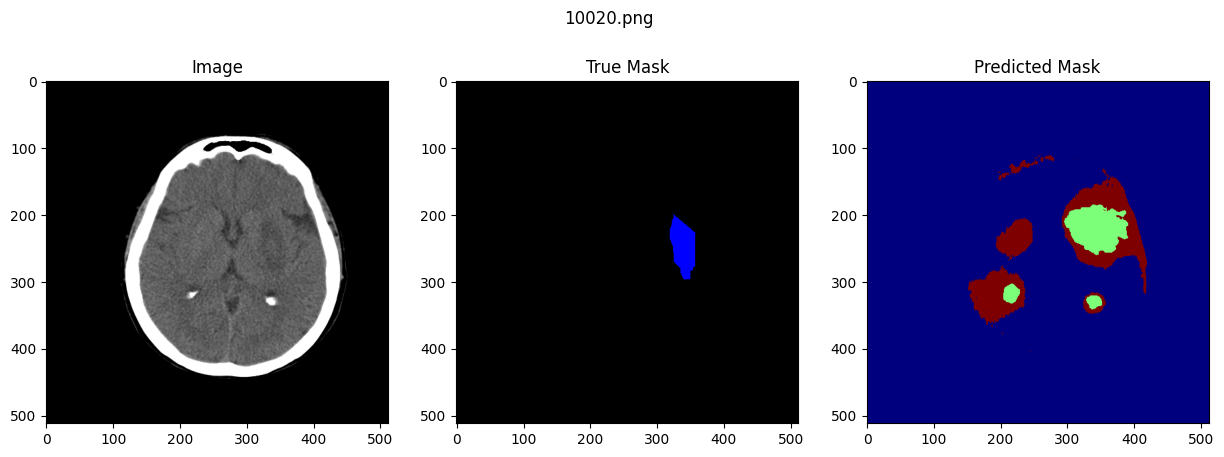

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


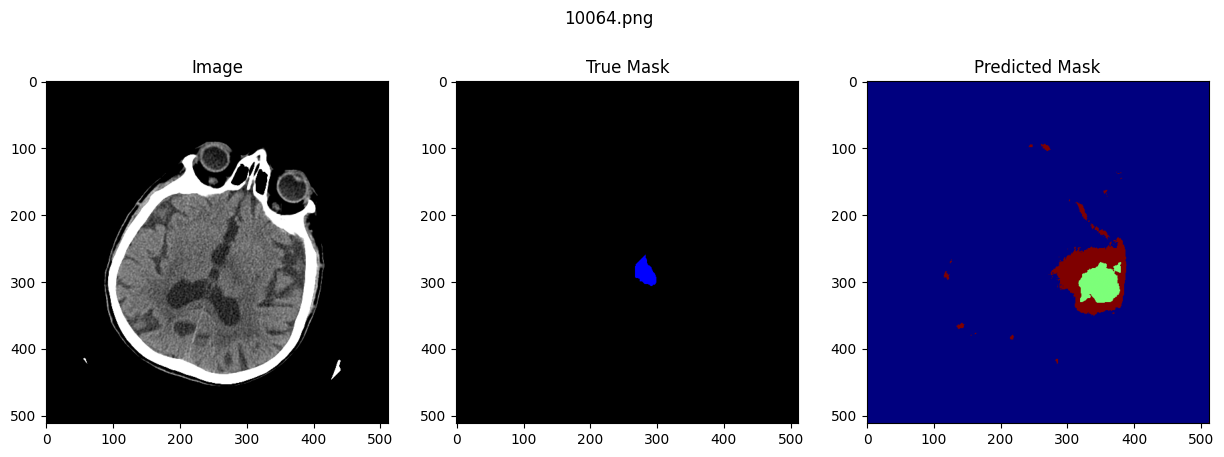

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


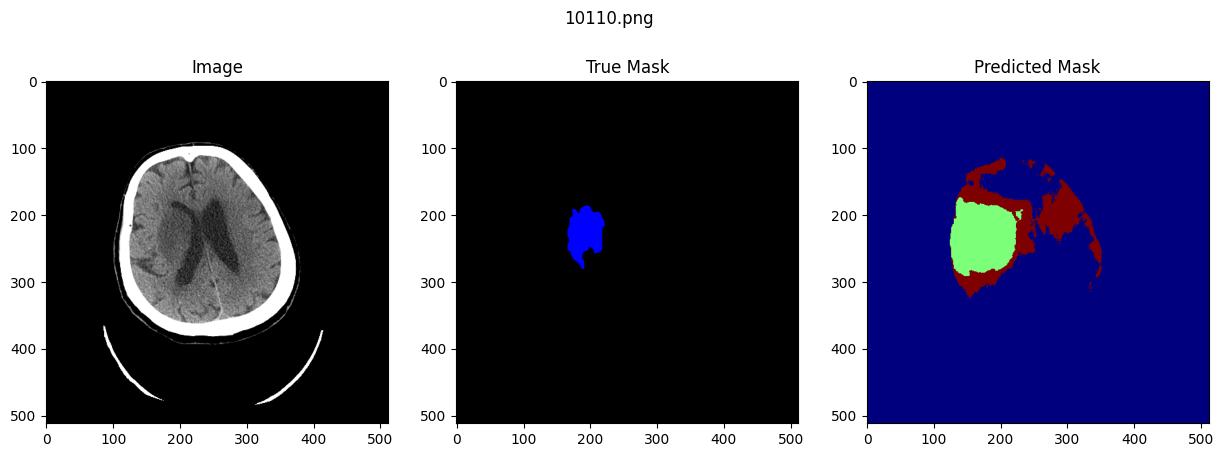

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


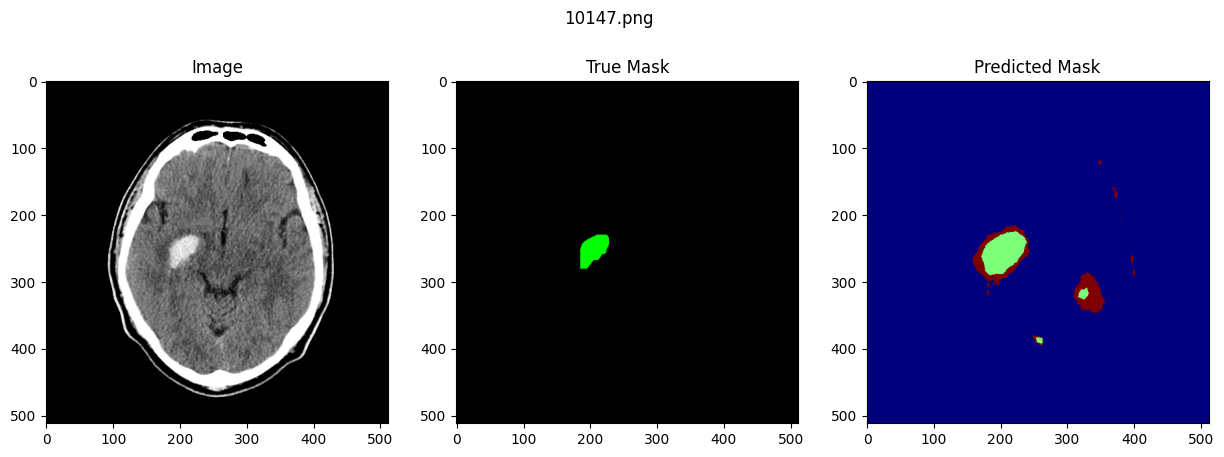

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


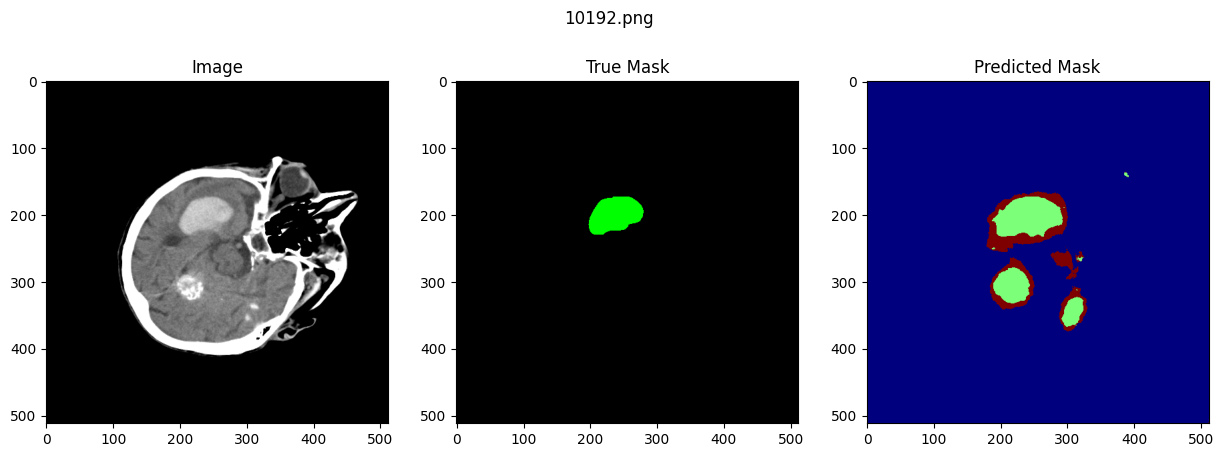

In [16]:
MASK_DIR = "/root/.cache/kagglehub/datasets/orvile/inme-veri-seti-stroke-dataset/versions/1/INME_VERI_SETI/YarısmaVeriSeti_2_Oturum/MASKS"
show_test_predictions_with_gt(test_dataset, model, test_image_paths, MASK_DIR, num=5)


In [21]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import os
from PIL import Image

def remove_red_area(pred_mask):
    if isinstance(pred_mask, tf.Tensor):
        pred_mask = pred_mask.numpy()
    return np.where(pred_mask == 2, 0, pred_mask)

def visual(dataset, model, image_paths, mask_dir, num=3):
    for i, images in enumerate(dataset.take(num)):
        preds = model.predict(images)
        img_name = os.path.basename(image_paths[i])

        # Load and prepare the true mask
        mask_path = os.path.join(mask_dir, img_name)
        if not os.path.exists(mask_path):
            print(f"Mask not found: {mask_path}")
            continue

        mask = Image.open(mask_path).resize((512, 512))
        mask = np.array(mask)

        # Get predicted class map and remove red (class 1)
        raw_pred = tf.argmax(preds[0], axis=-1)
        cleaned_pred = remove_red_area(raw_pred)

        # Plot all 3
        plt.figure(figsize=(15, 5))
        plt.subplot(1, 3, 1)
        plt.title("Image")
        plt.imshow(images[0])

        plt.subplot(1, 3, 2)
        plt.title("Ground Truth Mask")
        plt.imshow(mask, cmap='jet')

        plt.subplot(1, 3, 3)
        plt.title("Prediction ")
        plt.imshow(cleaned_pred, cmap='jet')

        plt.suptitle(img_name)
        plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


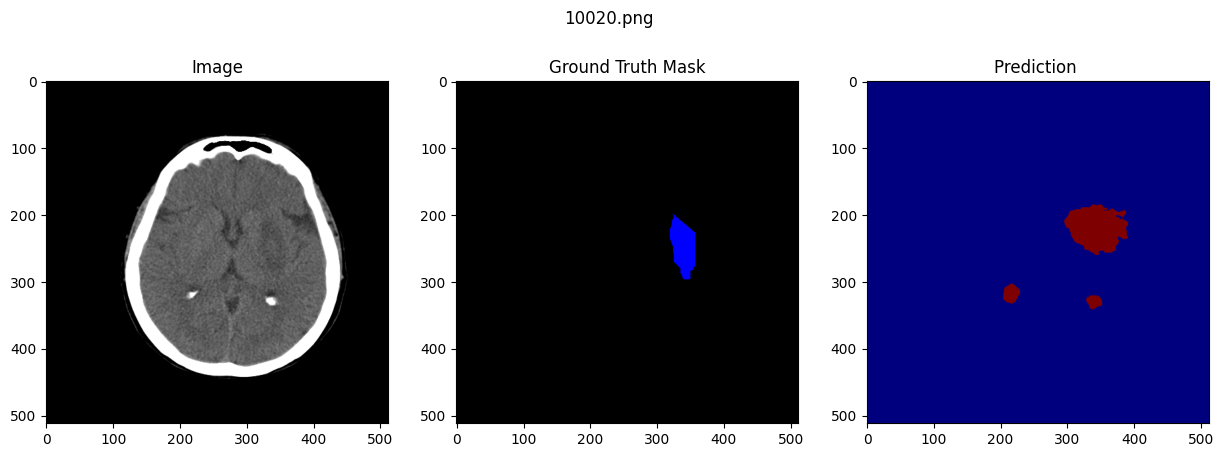

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


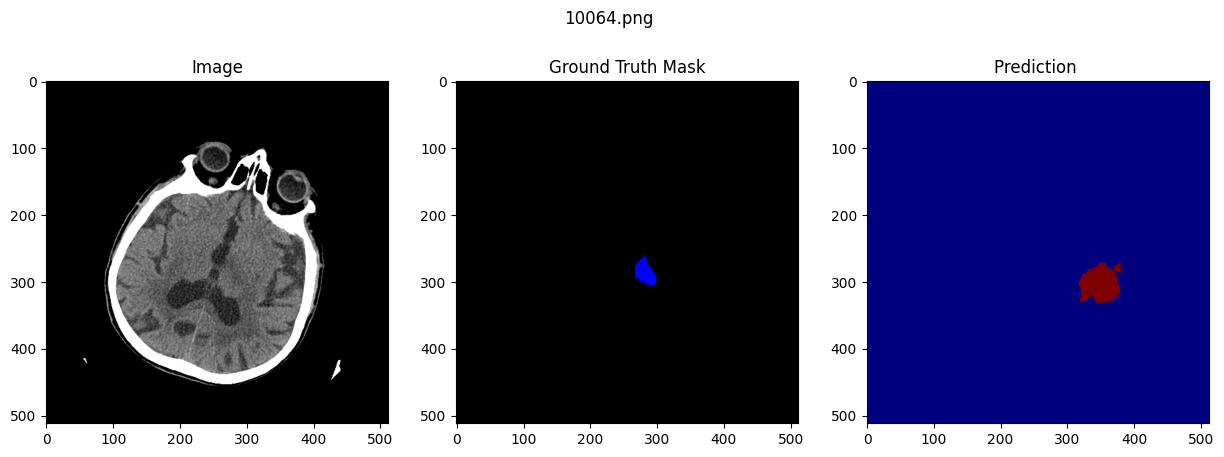

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


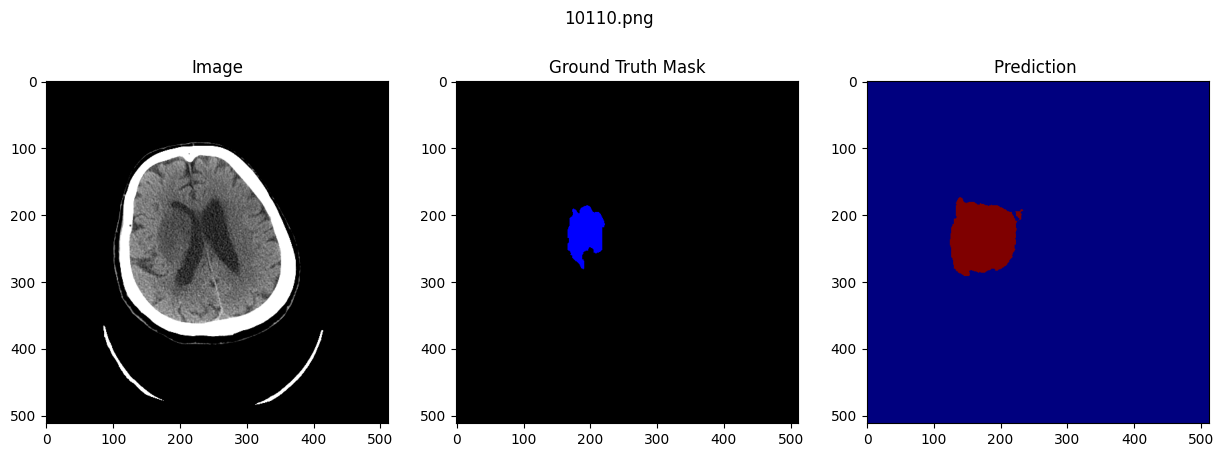

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


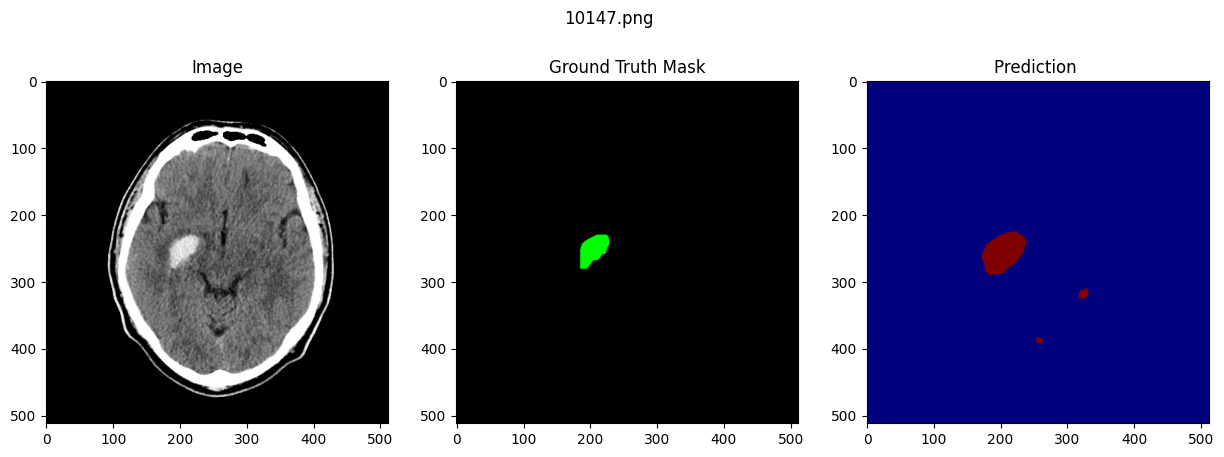

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


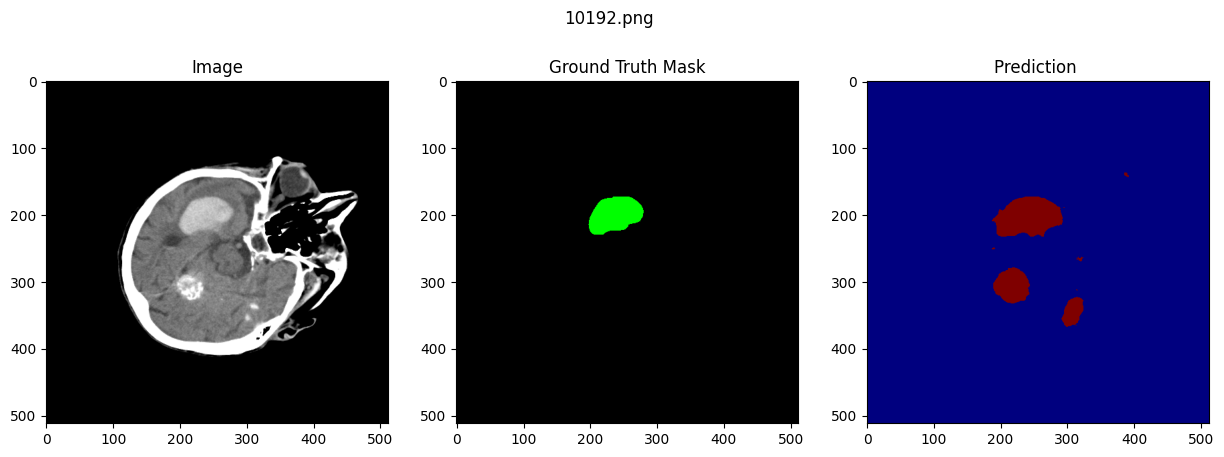

In [22]:
MASK_DIR = "/root/.cache/kagglehub/datasets/orvile/inme-veri-seti-stroke-dataset/versions/1/INME_VERI_SETI/YarısmaVeriSeti_2_Oturum/MASKS"
visual(test_dataset, model, test_image_paths, MASK_DIR, num=5)
